In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import autogluon


# importing dataset and visualizing 

In [2]:
train_raw = pd.read_csv('train.csv')
train_raw['train_test'] = 'train'
test_raw = pd.read_csv('test.csv')
test_raw['train_test'] = 'test'
train_test = pd.concat([train_raw, test_raw])
print (len(train_raw), len(test_raw))
train_test


891 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


### histogram of each variable

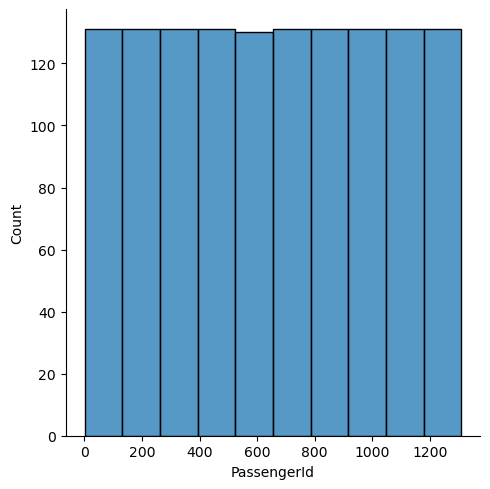

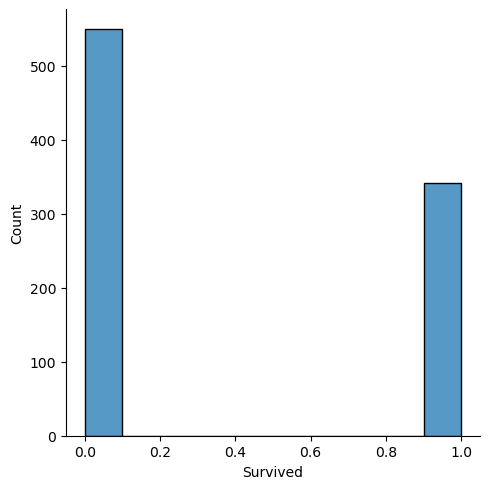

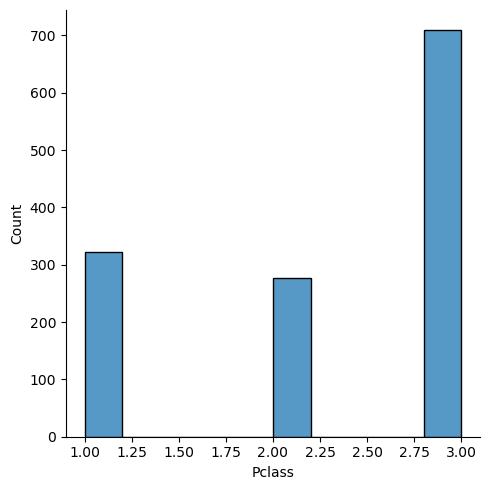

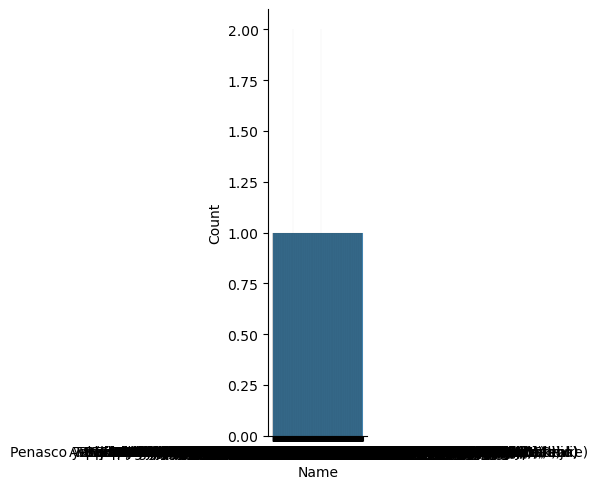

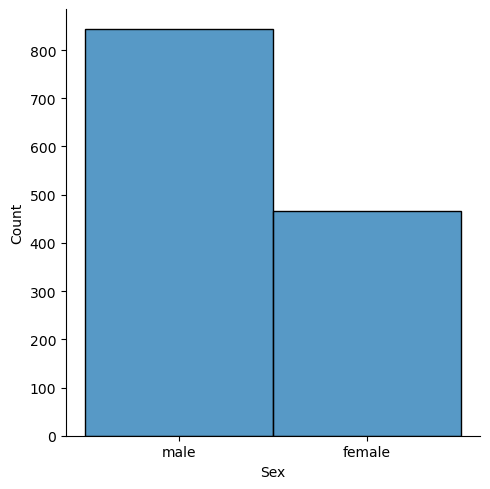

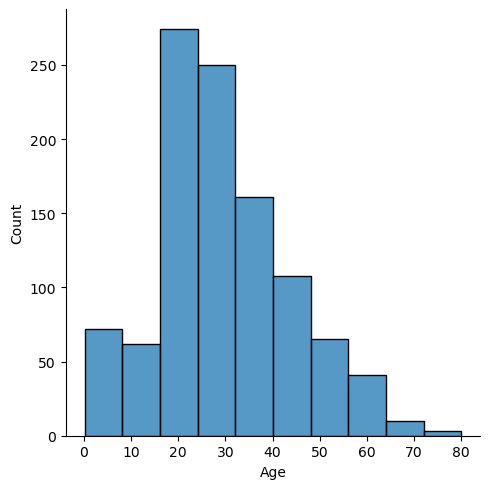

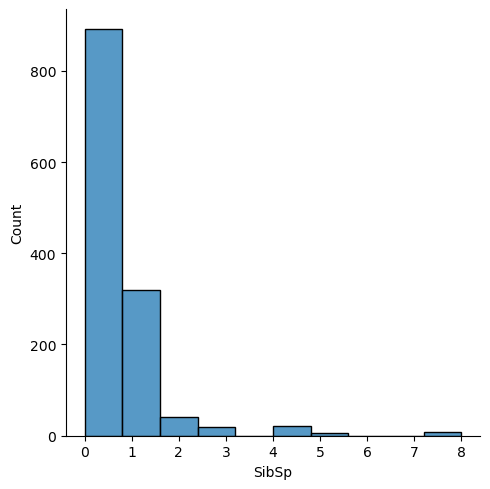

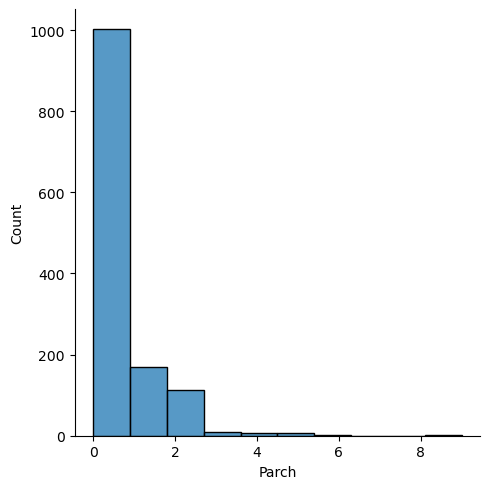

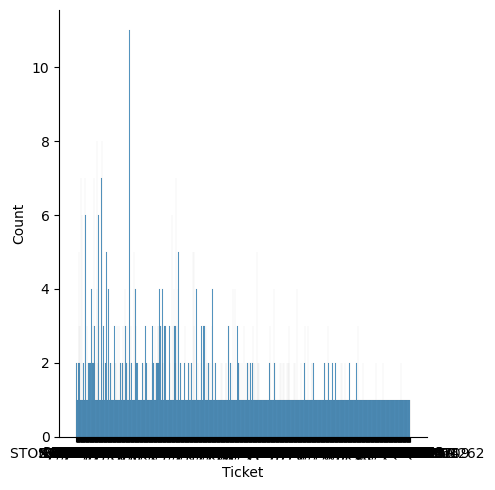

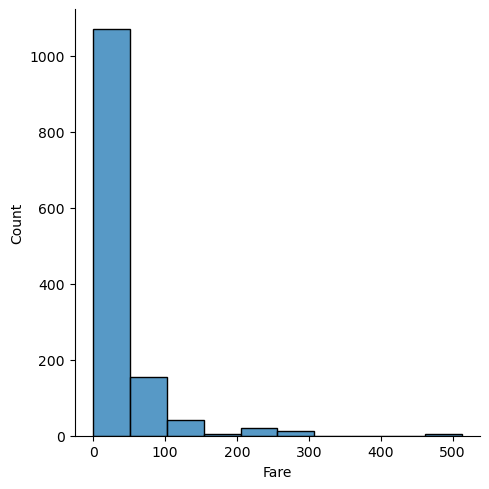

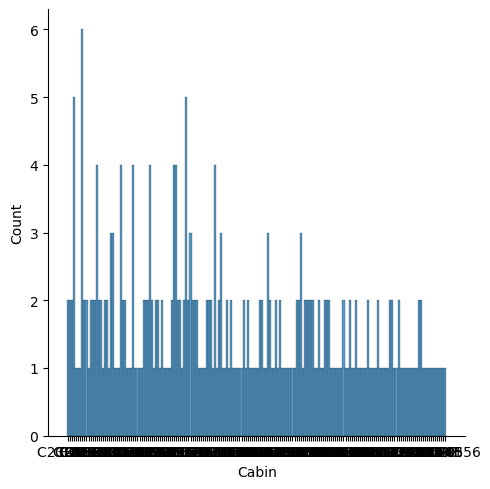

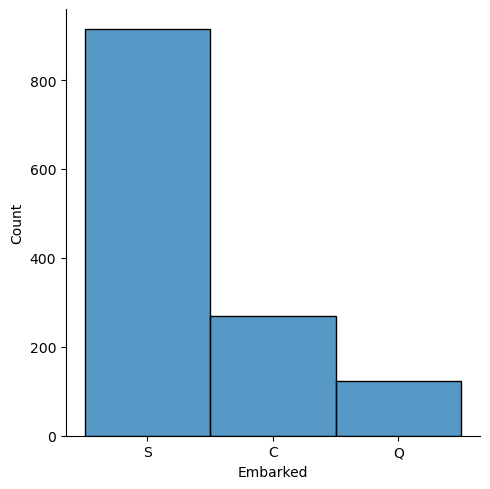

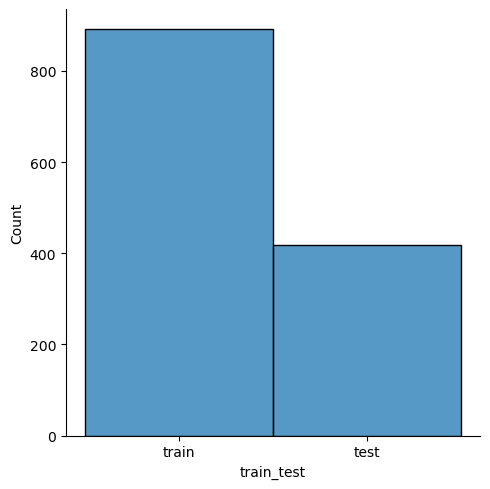

In [32]:
for column in train_test.columns:
    sns.displot(train_test[column], kde=False, bins=10)

# autogluon

In [4]:
from autogluon.tabular import TabularDataset, TabularPredictor


predictor = TabularPredictor(label='Survived').fit(train_data=train_raw)
predictions = predictor.predict(test_raw)


No path specified. Models will be saved in: "AutogluonModels/ag-20231218_234058"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231218_234058"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #101-Ubuntu SMP Tue Nov 14 13:30:08 UTC 2023
CPU Count

In [14]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.854749,accuracy,0.176981,11.620198,0.001064,0.649929,2,True,11
1,NeuralNetTorch,0.832402,accuracy,0.014297,3.155904,0.014297,3.155904,1,True,10
2,CatBoost,0.826816,accuracy,0.005435,2.930474,0.005435,2.930474,1,True,5
3,NeuralNetFastAI,0.826816,accuracy,0.013567,1.513759,0.013567,1.513759,1,True,8
4,XGBoost,0.815642,accuracy,0.007530,2.110811,0.007530,2.110811,1,True,9
5,ExtraTreesGini,0.815642,accuracy,0.066968,1.430614,0.066968,1.430614,1,True,6
6,RandomForestEntr,0.815642,accuracy,0.068576,0.918464,0.068576,0.918464,1,True,4
7,RandomForestGini,0.815642,accuracy,0.079783,0.954065,0.079783,0.954065,1,True,3
8,ExtraTreesEntr,0.810056,accuracy,0.062835,2.416067,0.062835,2.416067,1,True,7
9,KNeighborsDist,0.653631,accuracy,0.003473,0.377782,0.003473,0.377782,1,True,2


In [23]:
# appending the predictions

In [22]:
test_raw['Survived'] = predictions

test_raw[['PassengerId','Survived']].to_csv('pred.csv')

In [18]:
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train
